In [86]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# sklearnを用いた線形回帰とStanでのベイズ推定によるパラメーター推定を比較
# データセットの読み込み
# matplotlib をインラインモードにしておくこと

import os
import scipy as sp
import pandas as pd
import numpy as np
import sklearn as skln
from sklearn import linear_model
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

def dscale(x, axis = None):
    xmean = x.mean(axis=axis, keepdims=True)
    xstd  = np.std(x, axis=axis, keepdims=True)
    stnd = (x-xmean)/xstd
    return stnd

data = pd.read_csv('sample-data.csv')
print('---Data head---')
data.head()


---Data head---


,Number,age,b-press,lang,sex,ill_flg,weight
0,1,22,110,4300,1,1,79
1,2,23,128,4500,1,1,65
2,3,24,104,3900,2,0,53
3,4,25,112,3000,2,0,45
4,5,27,108,4800,1,0,80


In [60]:
# dataの詳細を見る

In [87]:
data.describe()

,Number,age,b-press,lang,sex,ill_flg,weight
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,38.033333,124.700000,3539.666667,1.500000,0.600000,57.800000
std,8.803408,12.047273,12.771601,623.120530,0.508548,0.498273,13.978802
min,1.000000,22.000000,104.000000,2350.000000,1.000000,0.000000,39.000000
25%,8.250000,29.250000,116.000000,3025.000000,1.000000,0.000000,47.250000
50%,15.500000,35.000000,125.500000,3535.000000,1.500000,1.000000,55.000000
75%,22.750000,45.000000,131.500000,3937.500000,2.000000,1.000000,65.000000
max,30.000000,65.000000,156.000000,4800.000000,2.000000,1.000000,90.000000


In [88]:
data['ill_flg'] = data['ill_flg'].astype('str')
type(data.loc[1,'ill_flg'])

str

In [89]:
lm = linear_model.LinearRegression()

# x is lang
x = data.loc[:, ['lang']].as_matrix()

# y is weight 
y = data['weight'].as_matrix()

# making forecast
lm = smf.ols('weight ~ lang', data = data).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     41.41
Date:                Sun, 06 May 2018   Prob (F-statistic):           5.73e-07
Time:                        23:06:02   Log-Likelihood:                -107.57
No. Observations:                  30   AIC:                             219.1
Df Residuals:                      28   BIC:                             221.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5332      9.673     -0.365      0.7

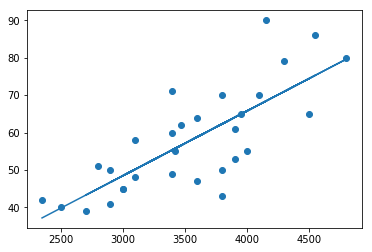

In [63]:
# data visualization with matplotlib
# Scatter plot

plt.scatter(x, y)

# regression line
plt.plot(x, lm.predict(data.loc[:,'lang']))
    # It seems that there is both of them are correlated

In [90]:
# making forecast
mlm1 = smf.ols('weight ~ lang + age', data = data).fit()

print(mlm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     37.66
Date:                Sun, 06 May 2018   Prob (F-statistic):           1.54e-08
Time:                        23:06:07   Log-Likelihood:                -101.20
No. Observations:                  30   AIC:                             208.4
Df Residuals:                      27   BIC:                             212.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -47.7589     14.157     -3.373      0.0

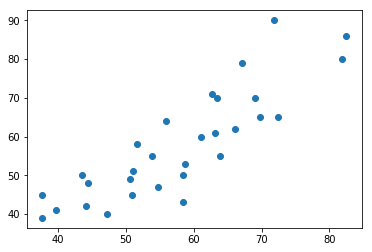

In [91]:
# data visualization with matplotlib
# regression line
plt.scatter(mlm1.predict(data.loc[:,['lang','age'] ]), y)
    # It seems that there is both of them are correlated

In [92]:
# making forecast
mlm2 = smf.ols('weight ~ lang + age + sex', data = data).fit()

print(mlm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     41.82
Date:                Sun, 06 May 2018   Prob (F-statistic):           4.31e-10
Time:                        23:06:09   Log-Likelihood:                -94.752
No. Observations:                  30   AIC:                             197.5
Df Residuals:                      26   BIC:                             203.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1488     17.916      0.176      0.8

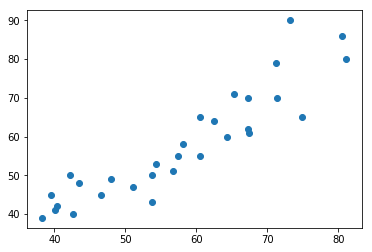

In [93]:
# data visualization with matplotlib
# regression line
plt.scatter(mlm2.predict(data.loc[:,['lang','age', 'sex'] ]), y)
    # It seems that there is both of them are correlated

In [94]:
# making forecast
mlm3 = smf.ols('weight ~ lang + age + sex + ill_flg', data = data).fit()

print(mlm3.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     30.46
Date:                Sun, 06 May 2018   Prob (F-statistic):           2.78e-09
Time:                        23:06:15   Log-Likelihood:                -94.627
No. Observations:                  30   AIC:                             199.3
Df Residuals:                      25   BIC:                             206.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.8977     18.594      0.263   

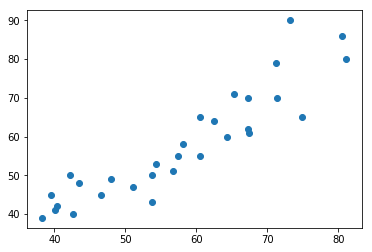

In [95]:
# data visualization with matplotlib
# regression line
plt.scatter(mlm2.predict(data.loc[:,['lang','age', 'sex', 'ill_flg'] ]), y)
    # It seems that there is both of them are correlated

In [96]:
# 病気の有無はあんまり効いてない？
# 年齢の当てはまりも悪くなりそう


(array([ 2.,  1.,  1.,  1.,  2.,  2.,  1.,  2.,  1.,  1.,  3.,  1.,  1.,
         1.,  1.,  4.,  1.,  1.,  1.,  2.]),
 array([  0. ,   1.2,   2.4,   3.6,   4.8,   6. ,   7.2,   8.4,   9.6,
         10.8,  12. ,  13.2,  14.4,  15.6,  16.8,  18. ,  19.2,  20.4,
         21.6,  22.8,  24. ]),
 <a list of 20 Patch objects>)

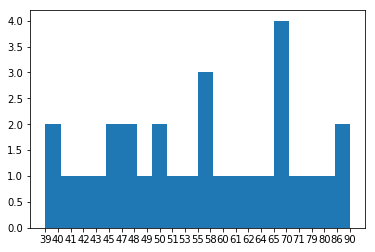

In [97]:
# check the distributions
plt.hist(data.loc[:,['weight']],
         bins = 20,
         range = None,
         normed = False,
         cumulative = False)


(array([ 3.,  2.,  1.,  1.,  3.,  1.,  1.,  2.,  3.,  1.,  2.,  1.,  2.,
         1.,  1.,  1.,  2.,  0.,  1.,  1.]),
 array([  0.  ,   1.25,   2.5 ,   3.75,   5.  ,   6.25,   7.5 ,   8.75,
         10.  ,  11.25,  12.5 ,  13.75,  15.  ,  16.25,  17.5 ,  18.75,
         20.  ,  21.25,  22.5 ,  23.75,  25.  ]),
 <a list of 20 Patch objects>)

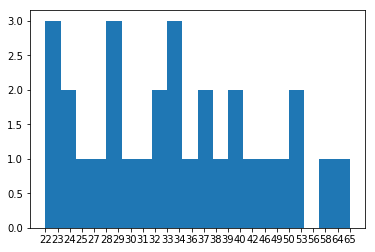

In [98]:
# age
plt.hist(data.loc[:,['age']],
         bins = 20,
         range = None,
         normed = False,
         cumulative = False)


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  30.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
        -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45,  0.5 ]),
 <a list of 20 Patch objects>)

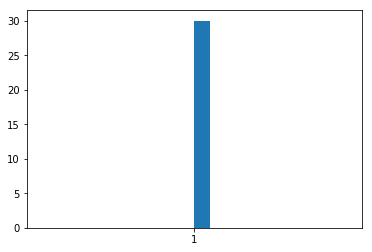

In [99]:
# volatile acidity
plt.hist(data.loc[:,['sex']],
         bins = 20,
         range = None,
         normed = False,
         cumulative = False)


#['alcohol', 'volatile acidity', 'sulphates']

(array([ 12.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  18.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

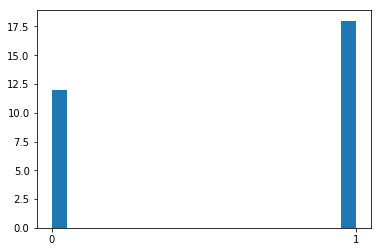

In [100]:
# sulphates
plt.hist(data.loc[:,['ill_flg']],
         bins = 20,
         range = None,
         normed = False,
         cumulative = False)


In [101]:
# Correl's
data.loc[:,['age', 'b-press', 'lang']].corr()

,age,b-press,lang
age,1.000000,0.646186,-0.617223
b-press,0.646186,1.000000,-0.485174
lang,-0.617223,-0.485174,1.000000


In [102]:
# making forecast
mlm = smf.ols('weight ~ lang + age + sex', data = data).fit()

# lang とsex でやっていたが、バックドア基準を考慮し、ageを入れた
print(mlm.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     41.82
Date:                Sun, 06 May 2018   Prob (F-statistic):           4.31e-10
Time:                        23:06:21   Log-Likelihood:                -94.752
No. Observations:                  30   AIC:                             197.5
Df Residuals:                      26   BIC:                             203.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1488     17.916      0.176      0.8

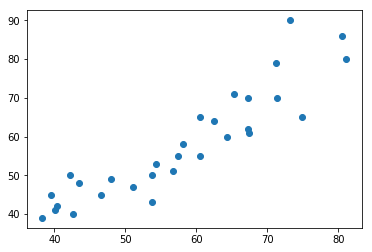

In [103]:
# 出来を確認する
plt.scatter(mlm.predict(data.loc[:,['lang','age', 'sex'] ]), y)

In [104]:
# ここからStanを使う
# 参考： http://www.currypurin.com/entry/pystan1
import pystan

In [79]:
# 先ずはシンプルな単回帰
X = data['lang']
Y = data['weight']

stan_data = {'N': len(data), 'X': X, 'Y': Y}
fit = pystan.stan(file='sample1.stan',data=stan_data, iter=3000, chains=3, thin=1)

# コンパイルとサンプリングを分けて、時間を短くするために、下記の記法を取る

st_d = pystan.StanModel(file='sample1.stan')
fit = st_d.sampling(data=stan_data, iter=2000, chains=3, warmup = 500, thin=2)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8cf19d72e0f2af48bad1a20c63a82253 NOW.
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8cf19d72e0f2af48bad1a20c63a82253 NOW.


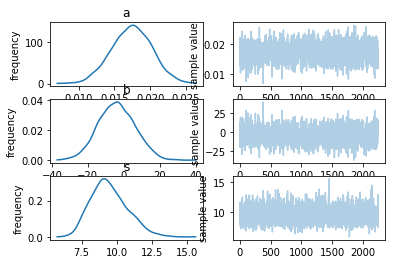

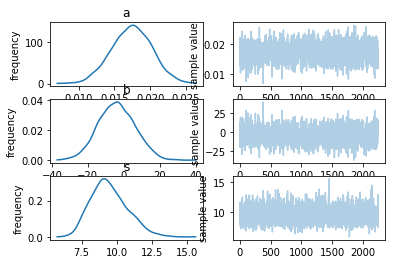

In [80]:
fit

fit.plot()

In [81]:
samples = fit.extract(permuted=True)
len(samples)
samples
len(samples['a'])

2250

Text(0.5,1,'Pystan linear regression')

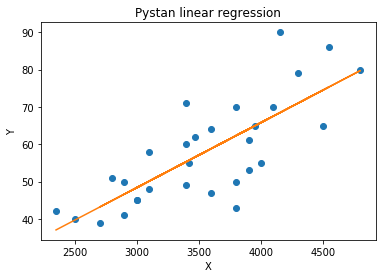

In [82]:
import seaborn as sns
df = pd.DataFrame(samples)

plt.plot(X,Y,"o")
plt.plot(X,samples["b"].mean() + X * samples["a"].mean())
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Pystan linear regression")


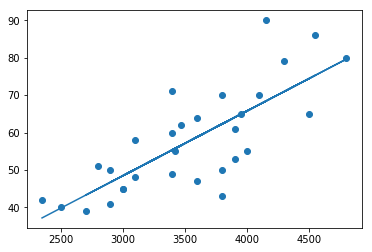

In [83]:
# 確認のためにlmも再掲
plt.scatter(x, y)
plt.plot(x, lm.predict(data.loc[:,'lang']))
    # 結果は変わらない

In [107]:
# 続いてはシンプルなmlmと同じ重回帰
Xlang = data['lang']
Xage = data['age']
SID = data['sex'] # sexを1以上にしているので、元データも M=1, F=2にしておく事
Y = data['weight']
N = len(data)
S = 2

stan_data = {'N': N, 'S':S, 'Xlang': Xlang, 'Xage': Xage, 'SID':SID, 'Y': Y}
#fit = pystan.stan(file='sample2.stan',data=stan_data, iter=3000, chains=3, thin=1)

# コンパイルとサンプリングを分けて、時間を短くするために、下記の記法を取る

st_d = pystan.StanModel(file='sample2.stan')
fit = st_d.sampling(data=stan_data, iter=1000, chains=3, warmup = 500, thin=2)



INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1815f1a53e4a635190cd39a5fb14c221 NOW.


In [108]:
fit

Inference for Stan model: anon_model_1815f1a53e4a635190cd39a5fb14c221.
3 chains, each with iter=1000; warmup=500; thin=2; 
post-warmup draws per chain=250, total post-warmup draws=750.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a0     -0.31    0.29   0.49  -1.72  -0.66  -0.01   0.02   0.14      3    1.8
b0      0.21    0.27   0.98  -3.02  -0.04   0.28   0.76   1.73     13   1.28
c0      7.37    4.72  22.66 -30.81  -9.71   4.87   20.3  58.21     23   1.08
a1[0]   0.33    0.29    0.5  -0.13 1.1e-3   0.03   0.67   1.74      3    1.8
a1[1]   0.33    0.29   0.49  -0.13-3.6e-3   0.02   0.67   1.72      3    1.8
b1[0]   0.08     0.3    1.0  -1.34  -0.52-2.0e-3   0.32   3.27     11    1.3
b1[1]  -0.01    0.27   0.95  -1.66  -0.53  -0.03   0.21    3.2     12   1.29
c1[0] -20.66   13.24  26.47 -92.32 -32.16 -14.79  -0.27   9.92      4   1.28
c1[1]  -6.69    7.15  17.52 -50.05 -10.27  -0.18   2.73  16.24      6   1.26
s_a     1.25    0.88   3.16 1.9e-3   0.02   

In [109]:
# 収束していない。おそらく30個では一階層のMCMCすらデータ数が足りないのだろう。